**Applied Empirical Analysis (HS 2020)**

**Conny Wunsch, Ulrike Unterhofer and Véra Zabrodina** -- University of Basel

***

# Lab Session 5 - Mediation Analysis

***


Key ingredients for a causal mediation analysis:

* Treatment $D$, mediator $M$ (intermediate outcome), and outcome $Y$.
* A thorough understanding of the channels and potential confounders (i.e. institutionl knowledge, theory) that jointly affect the treatment, mediator and outcome, and data to account for that.

## Application: Identifying causal mechanisms (primarily) based on inverse probability weighting

**Martin Huber, Journal of Applied Economics (2014)**



<img src="Med1.png" alt="Drawing" style="width: 550px;"/>


***
## 1. Introduction


* What is the research question, and why is it interesting?


* What is the treatment, the mediator, and the outcome(s) and when are they measured?


* How is the treatment assigned?


* Why can you not just regress the outcome on the mediator to identify a causal mechanism, i.e. what is the inherent endogeneity problem of all mediation analyses?


### Setup and notation

Follows the notation in the lecture lecture, different from the application.

The **Job Corps program** is an intensive job training program for young individuals from low-income households in the US. The program offers vocational training, education, health care, housing and board over an average duration of 8 months. 


* $D=d\in\{0,1\}$: treatment, participation in the Job Corps program (random assignment)
* $M=m\in\{0,1\}$: intermediate outcome or mediator, employment
* $Y$: final outcome of interest, self-assessed health 
* $Y^*_d(m)$ - potential outcome and $M^*_d$ - potential mediator for $d,m\in\{0,1\}$ 


Understand the potential outcomes framework:
   * $Y^*_1(M^*_1)$: potential health under **program participation** and **potential employment under program participation** - *observed*
    
    
   * $Y^*_1(M^*_0)$: potential health under **program participation** and **potential employment under non-participation** – *never observed*
    
    
   * $Y^*_0(M^*_1)$: potential health under **non-participation** and **potential employment under participation** – *never observed*
    
    
   * $Y^*_0(M^*_0)$: potential health under **non-participation** and **potential employment under non-participation** - *observed*


### What effects are we interested in?


* **Total effect of the treatment on outcome (ATE)**:

$$\theta_Y=E[Y^*_1-Y^*_0]=E[Y^*_1(M^*_1)-Y^*_0(M^*_0)]$$

* **Total effect of the treatment on mediator**: 

$$\theta_M=E[M^*_1-M^*_0]$$

* **Indirect effect of the treatment (via mediator)**:

$$\gamma^d = E[Y^*_d(M^*_1)-Y^*_d(M^*_0)]$$

... fix treatment status to $d$, vary mediator from $M^*_1$ to $M^*_0$

* **Direct effect of the treatment (not via mediator)**:

$$\delta^d = E[Y^*_1(M^*_d)-Y^*_0(M^*_d)]$$ 

... fix mediator to $M^*_d$, vary treatment status from 1 to 0.



For a discussion of the experimental design  and the ATEs on a broad range of outcomes, see *Schochet et al. (2001,2008)*. Their findings suggest that Job Corps positively impacts educational attainment, reduces criminality, and increases employment and earnings (in the short and medium term).


***

## 2. Identification strategy and assumptions




### Discussion of assumptions

* What do these assumptions mean in words?
* What could invalidate them? Think of concrete examples or mechanisms.
*	Which arguments or evidence can you provide to support that they hold?

![](./Causalpaths.JPG)

**A1: Stable unit treatment value assumption (SUTVA)**

$Y_i=D_iM_iY^*_{1,i}(1)+D_i(1-M_i)Y^*_{1,i}(0)+(1-D_i)M_iY^*_{0,i}(1)+(1-D_i)(1-M_i)Y^*_{0,i}(0)$


* The potential mediator values for each individual do not depend on the treatment status of the other individuals.
* The potential outcomes of each individual do not depend on the treatment status and the mediator value of the other individuals.



**A2: Independence of $D$ (here randomized)**

$Y^*_{d,i}(m), M^*_d \perp \!\!\! \perp D_i \text{  } \forall d,m \in{\{0,1\}}$

* The treatment is independent of the potential outcomes and mediators. 
* There are no confounders that jointly affect the treatment and the outcome or mediator. 

In observational studies this assumption has to be replaced by a **conditional independence assumption**. 


**A3: Sequential ignorability**

$Y^*_{d,i}(m)  \perp \!\!\! \perp M_i|D_i=d',X_i=x\quad \forall\ d,d',m\in\{0,1\},x\in\mathcal{X}.$

* The observed mediator is independent of the potential outcomes given the actual treatment status and pre-treatment confounders. 
* Conditional on $D$ and $X$ there can be no other confounders that jointly matter for the mediator and the outcome.

* We need to control for everything that affects employment and health outcomes given a particular treatment state.

**A4: Common support**

$0<Pr(D_i=d|M_i=m,X_i=x)<1\quad \forall\ d,m\in\{0,1\},x\in\mathcal{X}.$

* Conditional on $X$, the mediator state cannot be a deterministic function of the treatment. 
* We need comparable subjects for each mediator and treatment combination.


***

## 3. Setup and data

* The data stems from an experiment in the 1990ies which randomly assigned eligible applicants to the training program or to a control group. Surveys were conducted at baseline (shortly after random assignment) and at 12, 30, and 48 months after random assignment.


* List of variables: 




|Variable name| Description|
|:----|:----|
| **Key variables** | | 
|*treat*| 1=in program group; 0=in control group|
|*d_health30*| 1=very good health; 0=good to poor health, 30 months after assignment|
|*work2year2q*| employed in 1st half of second year after assignment|
| **Socio-economic factors** | | 
|*female*| 1 if female; 0 if male|
|*age_cat*| age at application in years 16-24|
|*rwhite*| white|
|*eduhigh*| higher education|
|*edumis*| education missing|
|*schobef*| in school 1 year before eligibility|
|*hhsize*| household size at assignment|
|*hhinc12*| low household income at assignment|
|*hhinc8*| high household income at assignment|
|*hhsizemis*| household size at assignment missing|
|*welf1*| once on welfare while growing up|
|*welf2*| twice on welfare while growing u|
|*fdstamp*| received foodstamps in year before assignment|
|*publicass*| public assistance in year before assignment|
|*everarr*| ever arrested before Job Corps|
|*arr_y1*| arrested up to 12 months after assignment|
| **Pre-mediator health (behavior)** | | 
|*health012*| good or very good health at assignment|
|*pe_prb0*| physical/emotional problems at assignment|
|*pe_prb0mis*| missing - physical/emotional problems at assignment|
|*everalc*| ever abused alcohol before assignment|
|*everilldrugs*| ever took illegal drugs before assignment|
|*health0mis*| general health at assignment missing|
| **Pre-mediator labor market state** | | 
|*jobyrbef*| job in year before Job Corps|
|*multjobyrbef*| number of jobs before Job Corps since reference date|
|*jobeverbef*| ever had a job before Job Corps|
|*trainyrbef*| training in year before Job Corps|



***
## 4. Empirical Analysis

### Load packages

Commands for mediation analysis are included in the `causalweight` package. 

In [22]:
# remove old objects from R working space
rm(list=ls())

# Load Packages
packages_vector <- c("tidyverse", "haven", "dplyr", 
                     "tidyr",  "sandwich", "arsenal",
                     "xtable", "data.table", "stargazer",  
                     "expss", "ggplot2")
lapply(packages_vector, require, character.only = TRUE) 

# Mediation-specific packages 
packaged_vector_med <- c("causalweight")
lapply(packaged_vector_med, require, character.only = TRUE) 

# List loaded packages 
(.packages())

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[1]]
[1] TRUE

[1] "causalweight" "expss"        "stargazer"    "data.table"   "xtable"      
 [6] "arsenal"      "sandwich"     "haven"        "forcats"      "stringr"     
[11] "dplyr"        "purrr"        "readr"        "tidyr"        "tibble"      
[16] "ggplot2"      "tidyverse"    "stats"        "graphics"     "grDevices"   
[21] "utils"        "datasets"     "methods"      "base"

### Load data

In [23]:
# load Job Corps data
load("causalmech_clean.RData")

# Store each variable in own R object
attach(data_clean)

# Inspect
head(data_clean)

print("Number of observations")
nrow(data_clean)

The following objects are masked from data_clean (pos = 3):

    age_cat, arr_y1, chibef, d_health30, eduhigh, edumis, everalc,
    everarr, everilldrugs, fdstamp, female, health012, health0mis,
    hhinc12, hhinc8, hhsize, hhsizemis, jobeverbef, jobyrbef,
    multjobyrbef, pe_prb0, pe_prb0mis, publicass, rwhite, schobef,
    trainyrbef, treat, welf1, welf2, work2year2q




,d_health30,treat,female,work2year2q,schobef,trainyrbef,multjobyrbef,jobeverbef,jobyrbef,health012,...,chibef,hhsize,hhsizemis,hhinc12,hhinc8,fdstamp,welf1,welf2,publicass,arr_y1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<labelled>
1,1,1,0,1,0,1,1,0,1,1,...,1,2,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,1,1,...,0,3,0,0,0,0,1,0,0,0
3,1,1,1,1,1,0,1,0,1,1,...,0,8,0,0,1,0,1,0,0,0
4,0,0,1,0,1,0,0,0,1,1,...,0,3,0,0,1,0,1,0,1,0
5,0,1,1,1,1,0,1,0,1,0,...,0,6,0,0,1,0,0,1,0,0
6,0,1,0,1,0,0,0,0,1,0,...,0,6,0,1,0,1,0,0,0,0


[1] "Number of observations"


[1] 10025

#### Define the variables of interest

We focus on the subsample of females in our analysis.

In [24]:
cro(female)

d = treat[female==1]       # Job Corps - treatment
m = work2year2q[female==1] # employment - mediator
y = d_health30[female==1]    # health - outcome 

,,#Total
1 if female; 0 if male,0,5673
,1,4352
,#Total cases,10025


### Descriptive statistics

Number of observations across treatment and mediator groups 

In [25]:
cro(d,m)

|   |              |    m |      |
 |   |              |    0 |    1 |
 | - | ------------ | ---- | ---- |
 | d |            0 |  606 |  945 |
 |   |            1 | 1187 | 1614 |
 |   | #Total cases | 1793 | 2559 |

In [26]:
# Function for table display
repr_html.xtable <- function(obj, ...){
    paste(capture.output(print(obj, type = 'html')), collapse="", sep="")
}

# Define a function estimating the differences in x across group 
# Now two arguments! 
balance_check.model <- function(x, group){
    
    # Conditional means
    mean_group0 <- mean(x[group==0])
    mean_group1 <- mean(x[group==1])
    
    # Difference in means
    diff <- lm(x ~ group)
    cov <- vcovHC(diff, type = "HC")
    robust.se <- sqrt(diag(cov))
    
    list(mean_group0 = mean_group0, mean_group1 = mean_group1,
        coeff = diff$coefficients[2], 
        robust.se = robust.se[2], 
        pval = 2*pnorm(-abs(diff$coefficients[2]/robust.se[2])) )             
}

#### Are there differences in the outcome or mediator across treatment groups?

In [27]:
ym <- cbind(y,m)
ym_names <- colnames(ym)

diff_output <- apply(ym, 2, balance_check.model, group=d)

# convert list to table
diff_output<-rbindlist(diff_output)
rownames(diff_output)<- ym_names
colnames(diff_output)<- c("E(X|D=0)", "E(X|D=1)", 
                          "Difference", "s.e.", 
                          "p-value")

# plot table
print("Difference in means by treatment status")
xtable(diff_output, digits=3)

[1] "Difference in means by treatment status"


,E(X|D=0),E(X|D=1),Difference,s.e.,p-value
y,0.315,0.343,0.028,0.015,0.055
m,0.609,0.576,-0.033,0.016,0.033


#### Is there selection into the treatment? 

In this context: did the randomization of the treatment work successfully?

We replicate Table V., cols 1-4 (page 939)

For simplicity, we only focus on covariates that have been measured before or at the assignment of the treatment.

In [28]:
# Select pre-treatment confounders
x = cbind(age_cat, rwhite, 
            eduhigh, edumis, schobef,
            hhsize, hhinc12, hhinc8, hhsizemis,
            welf1, welf2, fdstamp, publicass, everarr,
            health012, pe_prb0, pe_prb0mis,
            everalc, everilldrugs, health0mis,
            jobyrbef, multjobyrbef, jobeverbef,
            trainyrbef)[female==1,] 

x_names = colnames(x)

In [29]:
diff_output <- apply(x, 2, balance_check.model, group = d)

diff_output<-rbindlist(diff_output)
rownames(diff_output)<- x_names
colnames(diff_output)<- c("E(X|D=0)", "E(X|D=1)", 
                          "Difference", "s.e.", 
                          "p-value")

print("Difference in means by treatment status")
xtable(diff_output, digits=3)

[1] "Difference in means by treatment status"


,E(X|D=0),E(X|D=1),Difference,s.e.,p-value
age_cat,18.480,18.661,0.182,0.068,0.008
rwhite,0.203,0.210,0.007,0.013,0.574
eduhigh,0.031,0.032,0.001,0.006,0.881
edumis,0.021,0.015,-0.005,0.004,0.219
schobef,0.632,0.631,-0.002,0.015,0.914
hhsize,4.541,4.538,-0.003,0.071,0.967
hhinc12,0.337,0.344,0.008,0.015,0.612
hhinc8,0.363,0.351,-0.012,0.015,0.441
hhsizemis,0.025,0.018,-0.007,0.005,0.141
welf1,0.387,0.407,0.020,0.015,0.193


#### Is there selection into the mediator?

In [30]:
diff_output_m <- apply(x, 2, balance_check.model, group=m)

diff_output_m<-rbindlist(diff_output_m)
rownames(diff_output_m)<- x_names
colnames(diff_output_m)<- c("E(X|M=0)", "E(X|M=1)", 
                          "Difference", "s.e.", 
                          "p-value")

print("Difference in means by mediator status")
xtable(diff_output_m, digits=3)

[1] "Difference in means by mediator status"


,E(X|M=0),E(X|M=1),Difference,s.e.,p-value
age_cat,18.377,18.750,0.373,0.067,0.000
rwhite,0.152,0.247,0.094,0.012,0.000
eduhigh,0.020,0.040,0.020,0.005,0.000
edumis,0.023,0.013,-0.010,0.004,0.022
schobef,0.635,0.629,-0.006,0.015,0.662
hhsize,4.702,4.425,-0.276,0.068,0.000
hhinc12,0.382,0.313,-0.069,0.015,0.000
hhinc8,0.393,0.329,-0.063,0.015,0.000
hhsizemis,0.026,0.017,-0.008,0.005,0.062
welf1,0.358,0.429,0.072,0.015,0.000


This step is analog to the descriptive statistics used in classical selection on observables. At this point, you might 
* Detect obvious lack of common support and drop corresponding groups of observations
* Generate any additional covariates to include in the models (e.g. dummies or polynomials for categories of a continuous variable, or relevant interaction terms).  

***

## Estimation

### (1) The Linear Structural Equation Model

$$Y_i=\alpha_1+\theta_YD_i+\xi_1'X_i+\varepsilon_{1,i} \text{   (1)}$$

$$M_i=\alpha_2+\theta_MD_i+\xi_2'X_i+\varepsilon_{2,i} \text{   (2)}$$ 

$$Y_i=\alpha_3+\delta D_i+\lambda M_i+\xi_3'X_i+\varepsilon_{3,i} \text{   (3)}$$ 


Estimated effects

* Total effect of treatment on outcome $\hat{\theta}_Y$

* Total effect of treatment on mediator $\hat{\theta}_M$

* Average direct effect $\hat{\delta}$

* Average indirect effect
    * Difference of coefficients method: $\hat{\gamma}=\hat{\theta}_Y-\hat{\delta}$
    * Product of coefficients method: $\hat{\gamma}=\hat{\lambda}\hat{\theta}_M$
    

Implicit additional identifying assumptions
* homogeneous effects in all equations, i.e. $\hat{\delta}^0=\hat{\delta}^1=\hat{\delta}$ and  $\hat{\gamma}^0=\hat{\gamma}^1=\hat{\gamma}$
* no interaction between treatment and mediator (A5)
* all equations for $Y_i$ and $M_i$ specified correctly (functional form)


* *Note:* Including $X$ in equation (1) is not necessary for identification if the treatment is randomized. It might increase the precision of the estimated effect.

In [31]:
# We define a function which stores the estimated effects
effects.LSE<-function(y,d,m,x){

  eq1 =lm(y~d)
  eq2 =lm(m~cbind(d,x))
  eq3 =lm(y~cbind(d,m,x))

  # Total Effect (ATE)
  te = eq1$coefficients[2]
  # Direct effect
  de = eq3$coefficients[2]
  # Indirect effect (choose one version)
        # Difference of coefficients method
        ie.1 = eq1$coefficients[2]-eq3$coefficients[2] 
        # Product of coefficients method
        ie.2 = eq2$coefficients[2]*eq3$coefficients[3]

 list(te=te, de.treat=de, de.control=de, 
      ie.treat=ie.1, ie.control=ie.1)
    
}

est.LSE<-effects.LSE(y=y,d=d,m=m,x=x) 
# distinguish arguments and inputs

print("Output of Function est.LSE")
est.LSE

[1] "Output of Function est.LSE"


$te
         d 
0.02845603 

$de.treat
cbind(d, m, x)d 
      0.0268815 

$de.control
cbind(d, m, x)d 
      0.0268815 

$ie.treat
          d 
0.001574539 

$ie.control
          d 
0.001574539

### Bootstrap

Now we need standard errors! We program and run a nonparametric bootstrap

Key steps

* Draw a bootstrap sample of the dataset (with replacement)
* Define inputs for the estimator based on this sampled data
* Estimate the effects and store them
* Repeat this many times (e.g. 1999)
* Calculate the standard deviation of the effect estimates across the bootstrap samples
* This gives you the correct standard errors of the effects in the main sample

In [32]:
# What to resample from?
print("Sample size")
length(y)

###  BOOTSTRAP ###
# Define a function for the bootstrap
bootstrap.mediation<-function(y,d,m,x,estimator,boot){

obs<-length(y) # store the number of observations
mat=c() # empty matrix for storing effect estimates 
temp=c() # empty vector to count bootstrap replications
    
# The bootstrap loop starts here:
# The loop will run as long as 
# temp < total number of bootstrap replications (boot)
while(length(temp)<boot){ 
    
        # draw a bootstrap sample    
        sboot<-sample(x=1:obs, # observations that are drawn from y 
                      size=obs, # number of obs as in original data
                      replace=TRUE) # with replacement 
                        # (one obs allowed to appear more than once)

        # redefine y, d, m and x from the bootstrap sample    
        yb=y[sboot] 
        db<-d[sboot]
        mb=m[sboot]
        if (length(x)==length(y)) xb<-x[sboot] 
        if (length(x)!=length(y)) xb<-x[sboot,] 
        # For a matrix x, length(x) = row * columns 
        # If x is a vector (one covariate only), do not need the comma 
        # If x is a matrix, need the comma

        # estimate the effects with a given estimator 
        # within the bootstrap sample 
        # estimator is a pre-defined function (e.g. effects.LSE) 
        # that is an input in the bootstrap 
        est<-c(estimator(yb,db,mb,xb)) 

        # add the estimates as an additional row in the effects matrix
        # one column per effect (as in output of estimator function)
        if (sum(is.na(est))==0) mat<-rbind(mat, est) 
        # ensure that only non-missing estimates are stored 
        # (sometimes estimator fails in a particular bootstrap sample)

        # increase length by 1 (ran 1 more bootstrap repetition)
        temp<-c(temp,1)

}

# store standard deviations of each estimated effect 
list(sd.te=sd(as.numeric(mat[,1])), 
     sd.de.treat=sd(as.numeric(mat[,2])), 
     sd.de.control=sd(as.numeric(mat[,3])),  
     sd.ie.treat=sd(as.numeric(mat[,4])), 
     sd.ie.control=sd(as.numeric(mat[,5])) )

}

[1] "Sample size"


[1] 4352

Run the bootstrap on the original data, with the `effects.LSE` estimator 

In [33]:
# Set seed for replicability - right before estimation!
set.seed(123456)

inf.LSE<-bootstrap.mediation(y=y,d=d,m=m,x=x,       # original data
                             estimator=effects.LSE, # defined above
                             boot=99)               # set to a higher number, e.g. 1999
inf.LSE

$sd.te
[1] 0.0143092

$sd.de.treat
[1] 0.01346954

$sd.de.control
[1] 0.01346954

$sd.ie.treat
[1] 0.002740924

$sd.ie.control
[1] 0.002740924

Collect the results in a table:

In [34]:
# Results for the LSE
results.LSE<-rbind(cbind(est.LSE$te, 
                         est.LSE$de.treat, 
                         est.LSE$de.control, 
                         est.LSE$ie.treat, 
                         est.LSE$ie.control), # effects
                    cbind(inf.LSE$sd.te, 
                          inf.LSE$sd.de.treat, 
                          inf.LSE$sd.de.control, 
                          inf.LSE$sd.ie.treat, 
                          inf.LSE$sd.ie.control), # s.e.
                    cbind(2*pnorm(-abs(est.LSE$te/inf.LSE$sd.te)), 
                          2*pnorm(-abs(est.LSE$de.treat/inf.LSE$sd.de.treat)), 
                          2*pnorm(-abs(est.LSE$de.control/inf.LSE$sd.de.control)),  
                          2*pnorm(-abs(est.LSE$ie.treat/inf.LSE$sd.ie.treat)), 
                          2*pnorm(-abs(est.LSE$ie.control/inf.LSE$sd.ie.control)) )) # p-values
colnames(results.LSE) <- c("ATE", "de.treat", "de.control", "ie.treat", "ie.control")
rownames(results.LSE) <- c("effect", "se", "p-val")

print("Results based on the LSE model")
xtable(results.LSE, digits=3)

[1] "Results based on the LSE model"


,ATE,de.treat,de.control,ie.treat,ie.control
effect,0.028,0.027,0.027,0.002,0.002
se,0.014,0.013,0.013,0.003,0.003
p-val,0.047,0.046,0.046,0.566,0.566


### (2) Flexible parametric estimator based on the controlled direct effects (CDE)


For a binary mediator, the (*natural*) direct effect can be expressed in terms of *controlled* direct effects. 
* Defined in terms of specific values of the mediator rather than its potential outcomes
* Measured in sub-populations defined by potential mediator values $M(d)$

$$\delta^d=\sum_{m=0}^{1}E[Y_i(1,m)- Y_i(0,m)| M_i(d)=m]Pr(M_i(d)=m)$$


We follow the following estimation steps:

1. Estimate in sample with $D_i=d,M_i=m:$ $\quad Y_i=\alpha_{d,m}+\xi_{d,m}'X_i+\varepsilon_{d,m,i}$


2. Predict $\hat{Y}(d,m,X_i)\equiv\hat{\alpha}_{d,m}+\hat{\xi}_{d,m}'X_i$ for all $i$ and $d,m\in\{0,1\}$


3. Calculate the shares of mediated individuals in subsamples of $d\in\{0,1\}$: $Pr(M_i=1|D_i=d)$


4. Construct CDEs: 
$$\hat{\delta}^{d,m}_c=\frac{\sum_{i=1}^N \underline{1}(D_i=d,M_i=m) [\hat{Y}(1,m,X_i)-\hat{Y}(0,m,X_i)]}{\sum_{i=1}^N \underline{1}(D_i=d,M_i=m)}$$


5. Construct the direct effects $\hat{\delta}^1$ and $\hat{\delta}^0$: 

$$\hat{\delta}_d=\hat{\delta}^{d,0}_c*[1-\hat{P}r(M_i=1|D_i=d)]+\hat{\delta}^{d,0}_c*\hat{P}r(M_i=1|D_i=d) \text{ for } d\in\{0,1\}$$


6. Derive the indirect effects: 

$$\hat{\gamma}^{1-d} = \hat{\theta}_Y - \hat{\delta}^d$$


The total effect is given by: 

$$\hat{\theta}_Y = E[Y|D=1]- E[Y|D=0]$$


In [35]:
effects.CDE<-function(y,d,m,x){

mydata <-data.frame(y,d,m,x)

# 1. Estimate the outcomes model in subsamples of m and d
m.d1.m1<-lm(y~.-m-d, data=subset(mydata, d==1 & m==1))
m.d1.m0<-lm(y~.-m-d, data=subset(mydata, d==1 & m==0))
m.d0.m1<-lm(y~.-m-d, data=subset(mydata, d==0 & m==1))
m.d0.m0<-lm(y~.-m-d, data=subset(mydata, d==0 & m==0))

# 2. Predict yhat out of sample
yhatd1m1=predict(m.d1.m1, newdata = mydata)
yhatd1m0=predict(m.d1.m0, newdata = mydata)
yhatd0m1=predict(m.d0.m1, newdata = mydata)
yhatd0m0=predict(m.d0.m0, newdata = mydata)
    
# 3. Shares of mediated in samples with D=1 and D=0
prm1d1=mean(m[d==1])
prm1d0=mean(m[d==0])

# 4. Construct average CDEs for all values of m and d
de.d1m1 = mean((yhatd1m1-yhatd0m1)[d==1 & m==1])
de.d1m0 = mean((yhatd1m0-yhatd0m0)[d==1 & m==0])
de.d0m1 = mean((yhatd1m1-yhatd0m1)[d==0 & m==1])
de.d0m0 = mean((yhatd1m0-yhatd0m0)[d==0 & m==0])

# 5. Derive the direct effects
    
# Direct effect under treatment
de.treat= de.d1m0*(1-prm1d1) + de.d1m1*prm1d1
# Direct effect under control
de.control= de.d0m0*(1-prm1d0) + de.d0m1*prm1d0
    
# 6. Derive the indirect effects
    
# Total effect
te=mean(y[d==1])-mean(y[d==0])
    
# Indirect effect under treatemnt
ie.treat= te - de.control
# Indirect effect under control
ie.control= te - de.treat

# collect all relevant effects    
list(te=te, 
     de.treat=de.treat, 
     de.control=de.control, 
     ie.treat=ie.treat, 
     ie.control=ie.control)
}

est.CDE <- effects.CDE(y=y,d=d,m=m,x=x)
est.CDE

Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"


$te
[1] 0.02845603

$de.treat
[1] 0.02708292

$de.control
[1] 0.02621729

$ie.treat
[1] 0.002238747

$ie.control
[1] 0.00137311

Inference:

In [36]:
set.seed(123456)

# Plug the estimator into the defined bootstrap function
inf.CDE<-bootstrap.mediation(y=y,d=d,m=m,x=x,
                             estimator=effects.CDE,
                             boot=99)
inf.CDE

Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a ran

Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a ran

Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a ran

Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a ran

Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m1, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d0.m0, newdata = mydata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(m.d1.m1, newdata = mydata):
"prediction from a ran

$sd.te
[1] 0.0143092

$sd.de.treat
[1] 0.01407762

$sd.de.control
[1] 0.013457

$sd.ie.treat
[1] 0.003813378

$sd.ie.control
[1] 0.004991798

Collect the results in a table:

In [37]:
results.CDE<-rbind(cbind(est.CDE$te, est.CDE$de.treat, 
                         est.CDE$de.control, est.CDE$ie.treat, 
                         est.CDE$ie.control), 
                    cbind(inf.CDE$sd.te, inf.CDE$sd.de.treat, 
                          inf.CDE$sd.de.control, inf.CDE$sd.ie.treat, 
                          inf.CDE$sd.ie.control),
                    cbind(2*pnorm(-abs(est.CDE$te/inf.CDE$sd.te)), 
                          2*pnorm(-abs(est.CDE$de.treat/inf.CDE$sd.de.treat)), 
                          2*pnorm(-abs(est.CDE$de.control/inf.CDE$sd.de.control)),  
                          2*pnorm(-abs(est.CDE$ie.treat/inf.CDE$sd.ie.treat)), 
                          2*pnorm(-abs(est.CDE$ie.control/inf.CDE$sd.ie.control)) )) 
colnames(results.CDE) <- c("ATE", "de.treat", "de.control", "ie.treat", "ie.control")
rownames(results.CDE) <- c("effect", "se", "p-val")

print("Results based on the flexible parametric estimator")
xtable(results.CDE, digits=3)

[1] "Results based on the flexible parametric estimator"


,ATE,de.treat,de.control,ie.treat,ie.control
effect,0.028,0.027,0.026,0.002,0.001
se,0.014,0.014,0.013,0.004,0.005
p-val,0.047,0.054,0.051,0.557,0.783


Display the results of both estimators

In [38]:
results.par<-rbind(results.LSE, results.CDE)
colnames(results.par) <- c("ATE", "de.treat", "de.control", 
                           "ie.treat", "ie.control")
rownames(results.par) <- c("effect LSE", "se.LSE", "p-val.LSE", 
                           "effect CDE", "se.CDE", "p-val.CDE")

print("Results based on the parametric estimators")
xtable(results.par, digits=3)

[1] "Results based on the parametric estimators"


,ATE,de.treat,de.control,ie.treat,ie.control
effect LSE,0.028,0.027,0.027,0.002,0.002
se.LSE,0.014,0.013,0.013,0.003,0.003
p-val.LSE,0.047,0.046,0.046,0.566,0.566
effect CDE,0.028,0.027,0.026,0.002,0.001
se.CDE,0.014,0.014,0.013,0.004,0.005
p-val.CDE,0.047,0.054,0.051,0.557,0.783


This is a more flexible estimator:

* Allows indirect and direct effects to differ by treatment status.


* Implicitly assumes that all equations for $Y_i$ and all conditional means are specified correctly (functional form).


* Might be affected by data sparsity.

How do we interpret these effects? Do they differ by treatment status?


### (3) Inverse Probability Weighting


#### Compared to paramatric estimators:

* No functional form assumptions on the relationship between $Y$, $D$, $M$ and $X$.
* Assume a specific functional form for the relationship between $D$, $M$ and $X$ that may be relaxed with respect to $M$.




For a binary $D$ and $M$, Huber (2014) derives that 

$$E[Y^*_{d,i}(M^*_{d,i})]=E\left[\frac{Y_iI\{D_i=d\}}{Pr(D_i=d|X_i)}\right]$$

$$E[Y^*_{d,i}(M^*_{1-d,i})]=E\left[\frac{Y_iI\{D_i=d\}}{Pr(D_i=d|M_i,X_i)}\cdot\frac{Pr(D_i=1-d|M_i,X_i)}{Pr(D_i=1-d|X_i)}\right]$$

#### To implement the inverse probability weighting estimator:

1. Estimate the propensity scores and check common support:
    * $p(M_i, X_i)=Pr(D_i = 1 |M_i, X_i)$, by probit-regressing $D_i$ on $M_i$ and $X_i$ (if possible fully interact $M_i$ and $X_i$)
    * $p(X_i) = Pr(D_i=1|X=x)$, by probit-regressing $D_i$ on $X_i$

    If $D$ random simply  calculate $Pr(D_i=1)$  or use $p(X_i)$ to correct for small sample imbalances
    

2. Construct weights:

      We reweigh observations who chose $M=m$ under treatment $d$ to look like observations who chose $M=m$ under treatment $1-d$.
 
$$w^0(M_i, X_i) = \frac{\hat p(M_i,X_i)}{(1-\hat p(M_i, X_i))\hat p(X_i)}$$

$$w^1(M_i, X_i) = \frac{1-\hat p(M_i,X_i)}{\hat p(M_i, X_i)(1-\hat p(X_i))}$$

 

3. The direct effects are:

$$\hat{\delta}_0 = \frac{\sum_{i=1}^{N}w^1(M_i, X_i)Y_iD_i} {\sum_{i=1}^{N}w^1(M_i, X_i)D_i} - \frac{\sum_{i=1}^{N}Y_i(1-D_i)/(1-\hat{p}(X_i))} {\sum_{i=1}^{N}(1-D_i)/(1-\hat{p}(X_i))}$$

$$\hat{\delta}_1 = \frac{\sum_{i=1}^{N}Y_iD_i/\hat{p}(X_i)} {\sum_{i=1}^{N}D_i/\hat{p}(X_i)} - \frac{\sum_{i=1}^{N}w^0(M_i, X_i)Y_i(1-D_i)} {\sum_{i=1}^{N}w^0(M_i, X_i)(1-D_i)}$$



4. The indirect effects can be obtained by the difference of the total effect and the respective direct effects.

We first check the CS in the propensity scores $p(M_i, X_i)$ and $p(X_i)$ then apply the `causalweight` package that implements steps 2-4.


#### Propensity score estimation

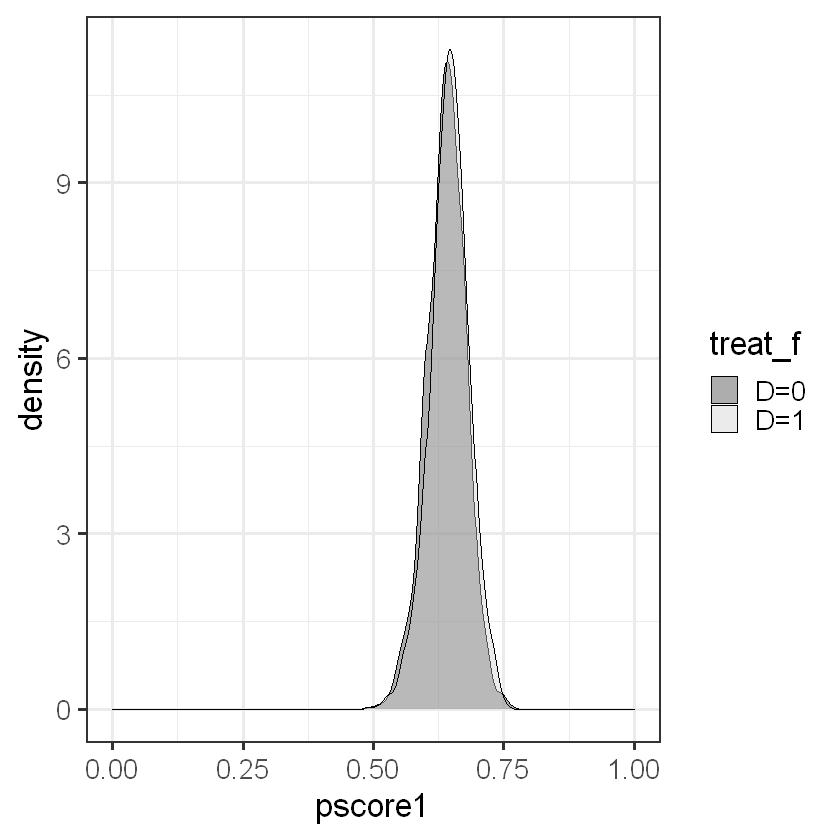

In [39]:
# Estimate the  propensity score p(M,X)
    mydata <-data.frame(y,d,m,x)
    mydata$pscore1 = predict(glm(d~m+x, family=binomial(probit)), type="response" )

# Check for common support in propensity score 
    # add factor variable for displaying
    mydata$treat_f <- factor(d, levels = c(0,1), label = c("D=0", "D=1")) 
    # plot separately by D
    ggplot(mydata, aes(x = pscore1, fill = treat_f)) + 
           geom_density(alpha=0.4) + scale_fill_grey() + 
          theme_bw(base_size = 20) +
          xlim(0, 1)

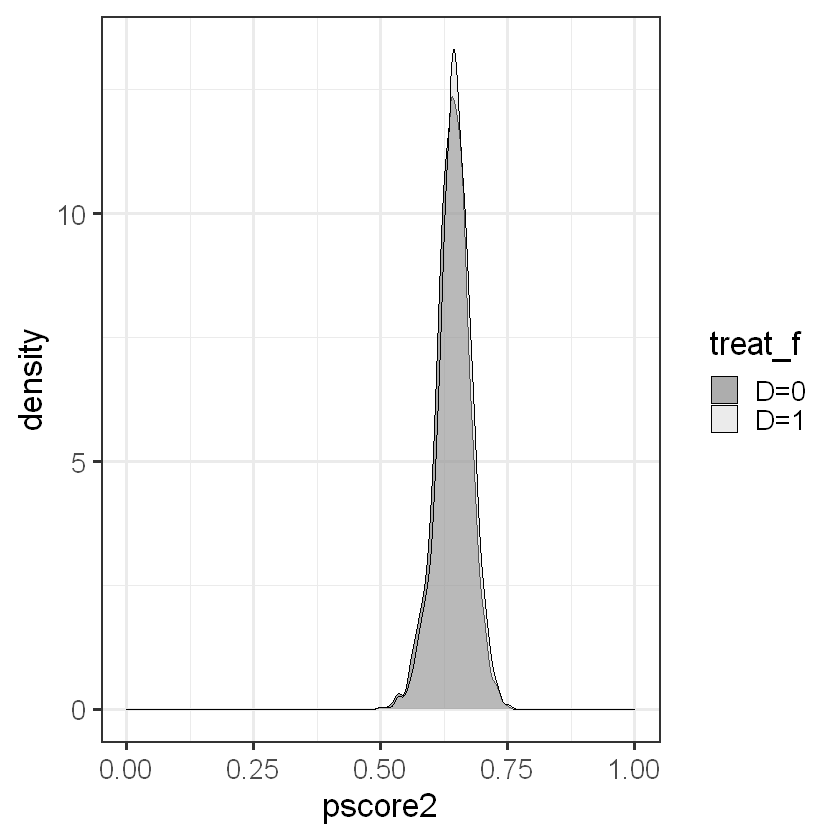

In [40]:
# Estimate the  propensity score p(X)
    mydata$pscore2 = predict(glm(d~x, family=binomial(probit)), type="response" )

# Check for common support in propensity score
    ggplot(mydata, aes(x = pscore2, fill = treat_f)) + 
           geom_density(alpha=0.4) + scale_fill_grey() + 
          theme_bw(base_size = 20) +
          xlim(0, 1)


Do we need to trim?

#### Applying the IPW estimator

In [41]:
#Estimate direct and indirect effect
IPW<-medweight(y=y,d=d,m=m,x=x, 
          boot=99, 
          trim = 0.05)
IPW

# Note: the package corrects for small sample imbalances

,ATE,dir.treat,dir.control,indir.treat,indir.control
effect,0.02728220,0.02758647,0.02747993,-0.0001977286,-0.0003042694
se,0.01451541,0.01444008,0.01464380,0.0007130341,0.0010682505
p-value,0.06017162,0.05608048,0.06057868,0.7815452042,0.7757746966


Are the effects comparable to the parametric estimators?

In [42]:
# Combine all estimators in a Table
results.all<-rbind(results.LSE, results.CDE, 
             rbind(cbind(IPW$results[1,1], IPW$results[1,2], 
                         IPW$results[1,3], IPW$results[1,4], 
                         IPW$results[1,5]),
                   cbind(IPW$results[2,1], IPW$results[2,2], 
                         IPW$results[2,3], IPW$results[2,4], 
                         IPW$results[2,5]),
                   cbind(IPW$results[3,1], IPW$results[3,2], 
                         IPW$results[3,3], IPW$results[3,4], 
                         IPW$results[3,5])) )

colnames(results.all) <- c("ATE", "de.treat", "de.control", "ie.treat", "ie.control")
rownames(results.all) <- c("effect LSE", "se.LSE", "p-val.LSE", 
                           "effect CDE", "se.CDE", "p-val.CDE",
                           "effect IPW", "se.IPW", "p-val.IPW")

print("Results based on all estimators")
xtable(results.all, digits=3)

# only estimators?

[1] "Results based on all estimators"


,ATE,de.treat,de.control,ie.treat,ie.control
effect LSE,0.028,0.027,0.027,0.002,0.002
se.LSE,0.014,0.013,0.013,0.003,0.003
p-val.LSE,0.047,0.046,0.046,0.566,0.566
effect CDE,0.028,0.027,0.026,0.002,0.001
se.CDE,0.014,0.014,0.013,0.004,0.005
p-val.CDE,0.047,0.054,0.051,0.557,0.783
effect IPW,0.027,0.028,0.027,-0.000,-0.000
se.IPW,0.015,0.014,0.015,0.001,0.001
p-val.IPW,0.060,0.056,0.061,0.782,0.776


Does the estimator choice matter here?

***

## Literature

Schochet Peter Z., John Burghardt and Steven Glazerman  (2001) National Job Corps study: the impacts of job corps on participants employment and related outcomes. *Report, Mathematica Policy Research*, Washington, DC.

Schochet Peter Z., John Burghardt  and Sheena McConnell (2008) Does Job Corps work? Impact findings from the National Job Corps study. *American Economic Review* 98: 1864–1886.